In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()
import numpy as np
from collections import Counter
lines=100000

In [2]:
data=pd.read_pickle(r"C:\Users\PIYUSH\Downloads\scaled_features.pkl")
data3 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\auto1.pkl")
data2 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\essay.pkl")
data_val=pd.read_pickle(r"C:\Users\PIYUSH\Downloads\val_set_wise.pkl")

In [7]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,0.382239,0.253870,0.38,0.285714,0.234043,0.223881,0.320513,0.102667,0.218750,0.126727
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,0.482625,0.356037,0.60,0.250000,0.319149,0.283582,0.461538,0.124883,0.335938,0.138315
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,0.339768,0.256966,0.32,0.250000,0.127660,0.194030,0.435897,0.043411,0.218750,0.105066
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,0.637066,0.628483,0.62,0.547619,0.297872,0.388060,0.512821,0.175000,0.523438,0.188104
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,0.490347,0.349845,0.49,0.273810,0.446809,0.432836,0.512821,0.174194,0.375000,0.105998


In [8]:
data=data.iloc[:,[1,28,29,30,31,32,33,34,35,36,37,38]]

In [9]:
data.head()

,essay_set,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity
0,1,0.397463,0.382239,0.253870,0.38,0.285714,0.234043,0.223881,0.320513,0.102667,0.218750,0.126727
1,1,0.479915,0.482625,0.356037,0.60,0.250000,0.319149,0.283582,0.461538,0.124883,0.335938,0.138315
2,1,0.320296,0.339768,0.256966,0.32,0.250000,0.127660,0.194030,0.435897,0.043411,0.218750,0.105066
3,1,0.635307,0.637066,0.628483,0.62,0.547619,0.297872,0.388060,0.512821,0.175000,0.523438,0.188104
4,1,0.535941,0.490347,0.349845,0.49,0.273810,0.446809,0.432836,0.512821,0.174194,0.375000,0.105998


In [10]:
del data_val["essay_id"]
del data_val["essay"]
p1=data_val["domain1_predictionid"]
p2=data_val["domain2_predictionid"]
del data_val["domain2_predictionid"]
del data_val["domain1_predictionid"]

In [11]:
max((data3[data3['essay_set'] == 1])["avg_trait_and_domain"])

12.0

In [12]:
ls=[]
def standard(m,s,i):
    a=((data3[data3['essay_set'] == i])['avg_trait_and_domain'])
    for i in a:
        ls.append((i-s)/(m-s))

In [13]:
for i in range(1,9):
    m = max((data3[data3['essay_set'] == i])['avg_trait_and_domain'])
    s = min((data3[data3['essay_set'] == i])['avg_trait_and_domain'])
    print(m)
    standard(m,s,i)

12.0
5.0
3.0
3.0
4.0
4.0
24.0
60.0


In [14]:
data3["new_scores"]=ls


In [46]:
#del data["essay"]

In [16]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain,new_scores
0,1,1,"Dear local newspaper, I think effects computer...",8.0,0.6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,0.7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,0.5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,0.8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,0.6


In [17]:
d=max((data3[data3['essay_set'] == 1])["new_scores"])
d

1.0

In [18]:
data3.shape

(12978, 5)

In [97]:
label=data3["avg_trait_and_domain"]

In [98]:
label.fillna(0,inplace=True)

In [21]:
data3["avg_trait_and_domain"].shape

(12978,)

In [22]:
data["new_scores"]=data3["new_scores"]

In [23]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain,new_scores
0,1,1,"Dear local newspaper, I think effects computer...",8.0,0.6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,0.7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,0.5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,0.8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,0.6


In [187]:

#del data['essay_set']

In [188]:
data.shape

(12978, 11)

In [226]:
label=data3["new_scores"]

In [227]:
label

0        0.60
1        0.70
2        0.50
3        0.80
4        0.60
5        0.60
6        0.80
7        0.80
8        0.70
9        0.70
10       0.60
11       0.60
12       0.50
13       0.40
14       0.40
15       1.00
16       0.60
17       0.60
18       0.20
19       0.40
20       0.60
21       0.10
22       0.80
23       0.90
24       0.60
25       0.70
26       0.20
27       0.70
28       0.70
29       0.60
         ... 
12948    0.60
12949    0.44
12950    0.52
12951    0.42
12952    0.40
12953    0.74
12954    0.60
12955    0.50
12956    0.46
12957    0.52
12958    0.52
12959    0.76
12960    0.60
12961    0.60
12962    0.60
12963    0.64
12964    0.60
12965    0.44
12966    0.52
12967    0.60
12968    0.00
12969    0.46
12970    0.68
12971    0.50
12972    0.40
12973    0.50
12974    0.44
12975    0.60
12976    0.60
12977    0.60
Name: new_scores, Length: 12978, dtype: float64

In [228]:
batch=20
i=0
label=label.values.reshape(12978,1)
label.shape

(12978, 1)

In [229]:
label

array([[0.6],
       [0.7],
       [0.5],
       ...,
       [0.6],
       [0.6],
       [0.6]])

In [284]:
h1=200
h2=200
h3=200
x=tf.placeholder(shape=[None,11],dtype=tf.float32)
y=tf.placeholder(shape=[None,1],dtype=tf.float32)
def forward(data1):
    a=len(data.iloc[0])
    std1=(1/np.sqrt(a))
    w1=tf.Variable(tf.random_normal([a,h1]))
    b1=tf.Variable(tf.random_normal([h1]))
    w1=tf.cast(w1,tf.float32)
    b1=tf.cast(b1,tf.float32)
    
    w2=tf.Variable(tf.random_normal([h1,h2]))
    b2=tf.Variable(tf.random_normal([h2]))
    w2=tf.cast(w2,tf.float32)
    b2=tf.cast(b2,tf.float32)
    
    w3=tf.Variable(tf.random_normal([h2,1]))
    b3=tf.Variable(tf.random_normal([1]))
    w3=tf.cast(w3,tf.float32)
    b3=tf.cast(b3,tf.float32)
    
    a0=data1
    a1=tf.nn.relu(tf.matmul(a0,w1) +b1)
    a2=tf.nn.relu(tf.matmul(a1,w2) +b2)
    a3=(tf.matmul(a2,w3) +b3)
    #a4=tf.nn.softmax(tf.matmul(a3,w4) +b4)
    return a3
def train():
    batch=21
    saver = tf.train.Saver()
    #h=20
    pred=forward(x)
    cost=tf.reduce_mean(tf.square(pred - y))
    train_step = tf.train.AdamOptimizer(0.0001).minimize(cost)
    correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        for j in range(250):
            for i in range(619):
                x_batch=data.iloc[i*batch:(i+1)*batch,:]
                y_batch=label[i*batch:(i+1)*batch]
                sess.run(train_step,feed_dict={x:x_batch,y:y_batch})
            #print('accuracy after epoch is',sess.run(accuracy,feed_dict={x:data,y:label}))
            print('corresponding loss',sess.run(cost,feed_dict={x:data,y:label}))
        p=(sess.run(pred,feed_dict={x:data}))
        return p

In [285]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [286]:
p=train()

corresponding loss 763.16156
corresponding loss 501.65042
corresponding loss 258.86816
corresponding loss 118.326324
corresponding loss 59.73414
corresponding loss 38.996483
corresponding loss 30.283293
corresponding loss 25.192894
corresponding loss 21.473267
corresponding loss 18.467579
corresponding loss 16.181269
corresponding loss 14.329625
corresponding loss 12.78288
corresponding loss 11.400213
corresponding loss 10.238663
corresponding loss 9.18619
corresponding loss 8.308787
corresponding loss 7.628619
corresponding loss 7.052447
corresponding loss 6.557523
corresponding loss 6.1354785
corresponding loss 5.7908707
corresponding loss 5.456056
corresponding loss 5.1838856
corresponding loss 4.957857
corresponding loss 4.734625
corresponding loss 4.543342
corresponding loss 4.3456564
corresponding loss 4.2071877
corresponding loss 4.0333695
corresponding loss 3.8780768
corresponding loss 3.7348433
corresponding loss 3.580024
corresponding loss 3.4196393
corresponding loss 3.27014

In [287]:
p

array([[0.58227324],
       [0.83572555],
       [0.39581084],
       ...,
       [0.29362655],
       [0.3731668 ],
       [0.84821486]], dtype=float32)

In [291]:
data["pred_confidence"]=p

In [293]:
data.head()

,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity,pred_confidence
0,0.397463,0.382239,0.253870,0.38,0.285714,0.234043,0.223881,0.320513,0.102667,0.218750,0.126727,0.582273
1,0.479915,0.482625,0.356037,0.60,0.250000,0.319149,0.283582,0.461538,0.124883,0.335938,0.138315,0.835726
2,0.320296,0.339768,0.256966,0.32,0.250000,0.127660,0.194030,0.435897,0.043411,0.218750,0.105066,0.395811
3,0.635307,0.637066,0.628483,0.62,0.547619,0.297872,0.388060,0.512821,0.175000,0.523438,0.188104,0.206526
4,0.535941,0.490347,0.349845,0.49,0.273810,0.446809,0.432836,0.512821,0.174194,0.375000,0.105998,-0.364115


In [35]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, max_depth=8,
                                 random_state=0)
clf.fit(data,label)
clf.score(data,label)

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.6568299042873467

In [36]:
pred_train=clf.predict(data)

In [40]:
len(pred_train)

12978

In [38]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=8)
regr.fit(data,label) 
regr.score(data,label)

0.5174838338718265

In [58]:
#del data_val["pred_labels"]
#del data_val["p1"]
#del data_val["p2"]

In [59]:
data_val.head()

,essay_set,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity
0,1,0.291954,0.247273,0.255411,0.268041,0.267606,0.340909,0.22,0.285714,0.372807,0.252747,0.333420
1,1,0.381609,0.312727,0.290043,0.329897,0.183099,0.477273,0.36,0.376623,0.064885,0.241758,0.304884
2,1,0.517241,0.465455,0.359307,0.494845,0.380282,0.590909,0.26,0.402597,0.559756,0.384615,0.159576
3,1,0.447126,0.341818,0.411255,0.474227,0.267606,0.386364,0.44,0.350649,0.201183,0.384615,0.310411
4,1,0.545977,0.447273,0.493506,0.371134,0.507042,0.500000,0.64,0.558442,0.205044,0.560440,0.259782


In [60]:
data.head()

,essay_set,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity
0,1,0.397463,0.382239,0.253870,0.38,0.285714,0.234043,0.223881,0.320513,0.102667,0.218750,0.126727
1,1,0.479915,0.482625,0.356037,0.60,0.250000,0.319149,0.283582,0.461538,0.124883,0.335938,0.138315
2,1,0.320296,0.339768,0.256966,0.32,0.250000,0.127660,0.194030,0.435897,0.043411,0.218750,0.105066
3,1,0.635307,0.637066,0.628483,0.62,0.547619,0.297872,0.388060,0.512821,0.175000,0.523438,0.188104
4,1,0.535941,0.490347,0.349845,0.49,0.273810,0.446809,0.432836,0.512821,0.174194,0.375000,0.105998


In [61]:
data3.iloc[30:40]

,essay_id,essay_set,essay,avg_trait_and_domain,new_scores
30,31,1,I agree that computers deffinately are an adva...,10.0,0.8
31,32,1,"Dear Local Newspaper, @CAPS1 name is @PERSON1 ...",10.0,0.8
32,33,1,"Dear, @ORGANIZATION1 I think the effects that ...",6.0,0.4
33,34,1,"Dear @LOCATION1, @CAPS1 is a rumor going aroun...",8.0,0.6
34,35,1,"Dear @CAPS1 @CAPS2, I think computers have a p...",9.0,0.7
35,36,1,"Dear @CAPS1 @CAPS2, Have you ever wondered wha...",10.0,0.8
36,37,1,"Dear @ORGANIZATION1, @CAPS1 has been brought t...",12.0,1.0
37,38,1,"Dear local Newspaper, @CAPS1 in the society we...",8.0,0.6
38,39,1,Dear local Newspaper A lot more people uses co...,10.0,0.8
39,40,1,"Dear local newspaper, my name is @PERSON1 I am...",7.0,0.5


In [62]:
test=data.iloc[30:40]
test_pred=clf.predict(test)
print(test_pred)
m = max((data3[data3['essay_set'] == 1])['avg_trait_and_domain'])
grade=m*test_pred
grade

[0.78107423 0.78006    0.47572347 0.64609308 0.67541984 0.76878221
 0.78991928 0.66527295 0.76034798 0.51290075]


array([9.37289076, 9.36072004, 5.70868159, 7.75311698, 8.10503807,
       9.22538654, 9.47903135, 7.98327535, 9.12417572, 6.15480905])

In [88]:
data_val["pred_labels"]=test_pred

In [89]:
data_val["p1"]=p1
data_val["p2"]=p2


0.46243759933095696

In [91]:
data_val.iloc[3918]

essay_set          7.000000
word_count         0.104777
vocab_count        0.158537
n_count            0.039216
v_count            0.103448
adj_count          0.096154
adv_count          0.114286
sent_len           0.065217
freek              0.181818
wrong_spell        0.223361
beaut              0.111111
perplexity         0.159866
pred_labels        0.462438
p1             23064.000000
p2                      NaN
Name: 3918, dtype: float64

In [92]:
data_val["result_score"]=test_pred

In [93]:
test_actual=pd.read_csv(r"C:\Users\PIYUSH\Downloads\AG\valid_sample_submission_5_column.csv")
test_actual.shape

(4818, 5)

In [33]:
data_val.head()

,essay_set,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity
0,1,0.291954,0.247273,0.255411,0.268041,0.267606,0.340909,0.22,0.285714,0.372807,0.252747,0.333420
1,1,0.381609,0.312727,0.290043,0.329897,0.183099,0.477273,0.36,0.376623,0.064885,0.241758,0.304884
2,1,0.517241,0.465455,0.359307,0.494845,0.380282,0.590909,0.26,0.402597,0.559756,0.384615,0.159576
3,1,0.447126,0.341818,0.411255,0.474227,0.267606,0.386364,0.44,0.350649,0.201183,0.384615,0.310411
4,1,0.545977,0.447273,0.493506,0.371134,0.507042,0.500000,0.64,0.558442,0.205044,0.560440,0.259782


NameError: name 'plt' is not defined

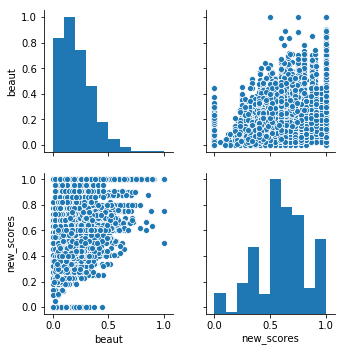

In [78]:
import seaborn as sns
g = sns.pairplot(data, vars=["beaut", "new_scores"])
plt.show()

In [95]:
ls=[]
for i in data_val['domain1_predictionid']:
    d=(test_actual[test_actual['prediction_id'] == i]["predicted_score"])
    ls.append(d.iloc[0])
#len(test_actual['prediction_id'].unique())

KeyError: 'domain1_predictionid'

In [194]:
val_labels=pd.DataFrame(ls)

In [375]:
data_val.to_pickle(r"C:\Users\PIYUSH\Downloads\val_results.pkl")

In [80]:
data_val=pd.read_pickle(r"C:\Users\PIYUSH\Downloads\val_results.pkl")
data_val.head()

,essay_set,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,beaut,perplexity,p1,p2,result_score
0,1,0.291954,0.247273,0.255411,0.268041,0.267606,0.340909,0.22,0.285714,0.372807,0.252747,0.333420,1788,NaN,0.578698
1,1,0.381609,0.312727,0.290043,0.329897,0.183099,0.477273,0.36,0.376623,0.064885,0.241758,0.304884,1789,NaN,0.622871
2,1,0.517241,0.465455,0.359307,0.494845,0.380282,0.590909,0.26,0.402597,0.559756,0.384615,0.159576,1790,NaN,0.664764
3,1,0.447126,0.341818,0.411255,0.474227,0.267606,0.386364,0.44,0.350649,0.201183,0.384615,0.310411,1791,NaN,0.659840
4,1,0.545977,0.447273,0.493506,0.371134,0.507042,0.500000,0.64,0.558442,0.205044,0.560440,0.259782,1792,NaN,0.764479


In [82]:
data_val["result_score"]

0       0.578698
1       0.622871
2       0.664764
3       0.659840
4       0.764479
5       0.722299
6       0.742632
7       0.870443
8       0.620834
9       0.785474
10      0.651136
11      0.743681
12      0.539316
13      0.750924
14      0.522048
15      0.625226
16      0.630365
17      0.834484
18      0.589133
19      0.637016
20      0.661212
21      0.668162
22      0.725546
23      0.838943
24      0.660307
25      0.582954
26      0.409286
27      0.667737
28      0.709434
29      0.602201
          ...   
4188    0.552947
4189    0.612865
4190    0.447174
4191    0.605596
4192    0.595385
4193    0.581902
4194    0.664259
4195    0.300047
4196    0.513521
4197    0.574509
4198    0.428642
4199    0.538229
4200    0.254890
4201    0.561792
4202    0.494616
4203    0.462314
4204    0.532935
4205    0.658636
4206    0.640993
4207    0.464575
4208    0.516717
4209    0.478300
4210    0.487978
4211    0.548439
4212    0.541920
4213    0.518330
4214    0.555511
4215    0.5569

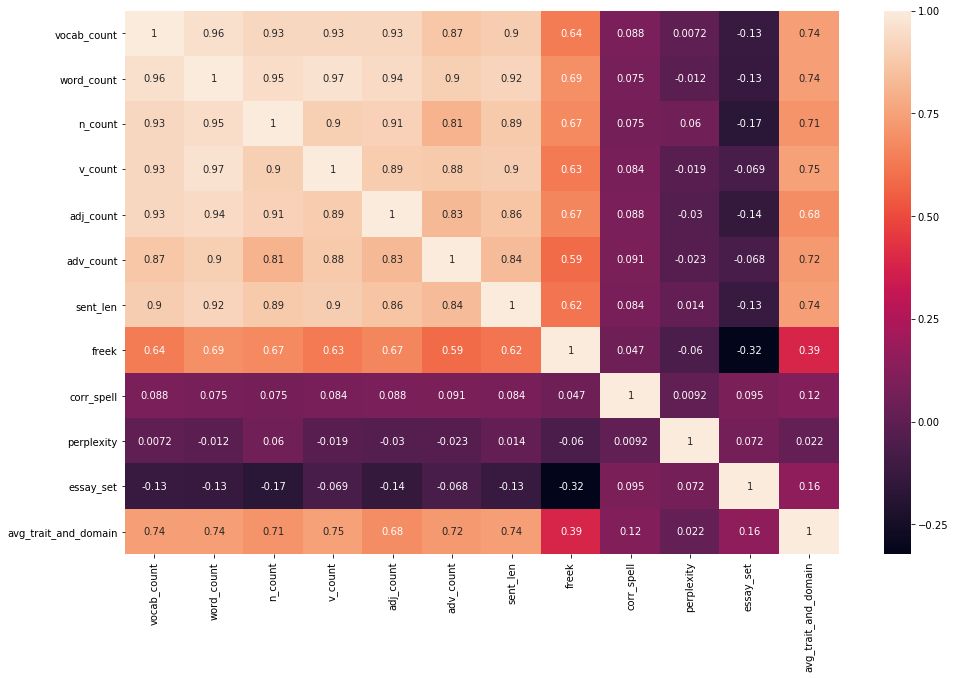

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


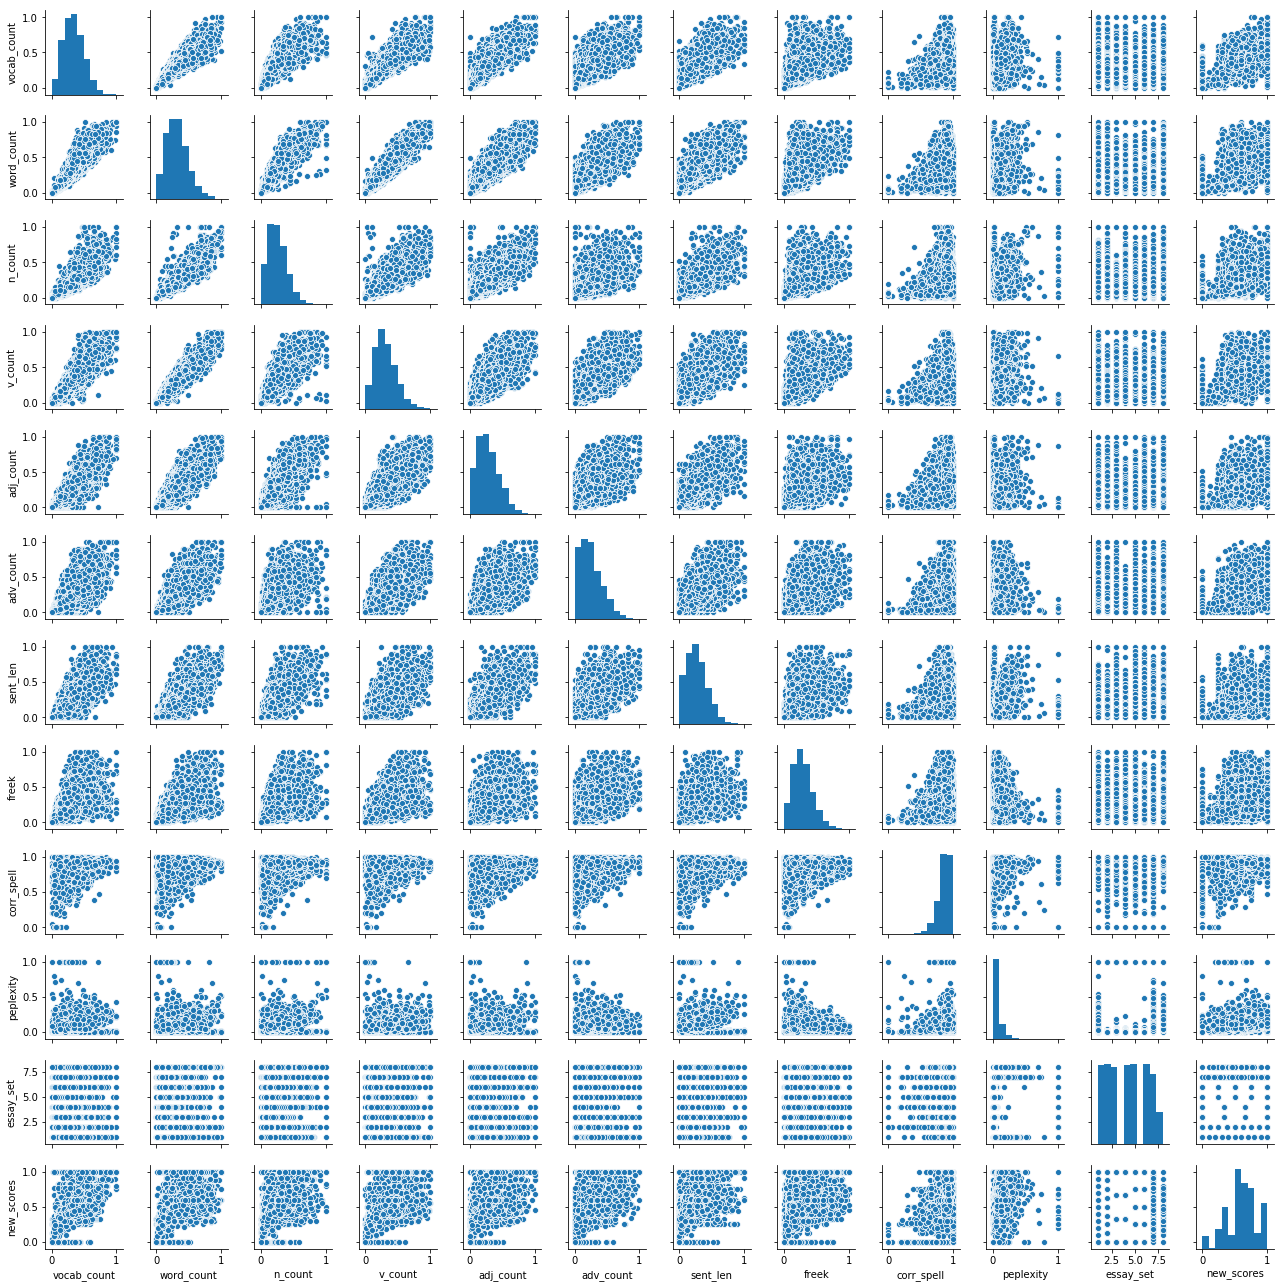

In [152]:
sns.pairplot(data4, size=1.5);
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

In [514]:
data["n_count"]=np.log(data["n_count"])

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [515]:
data.isnull().sum()

essay_set      0
vocab_count    0
word_count     0
n_count        0
v_count        0
adj_count      0
adv_count      0
sent_len       0
freek          0
beaut          0
corr_spell     0
dtype: int64

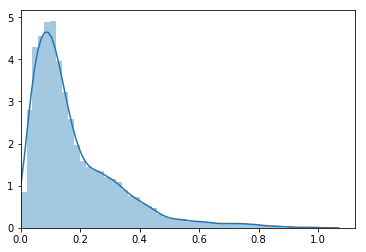

In [516]:
ls=["v_count"]
sns.distplot(data[ls]).set(xlim=(0))
plt.show()

In [101]:
df["y"]=y

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


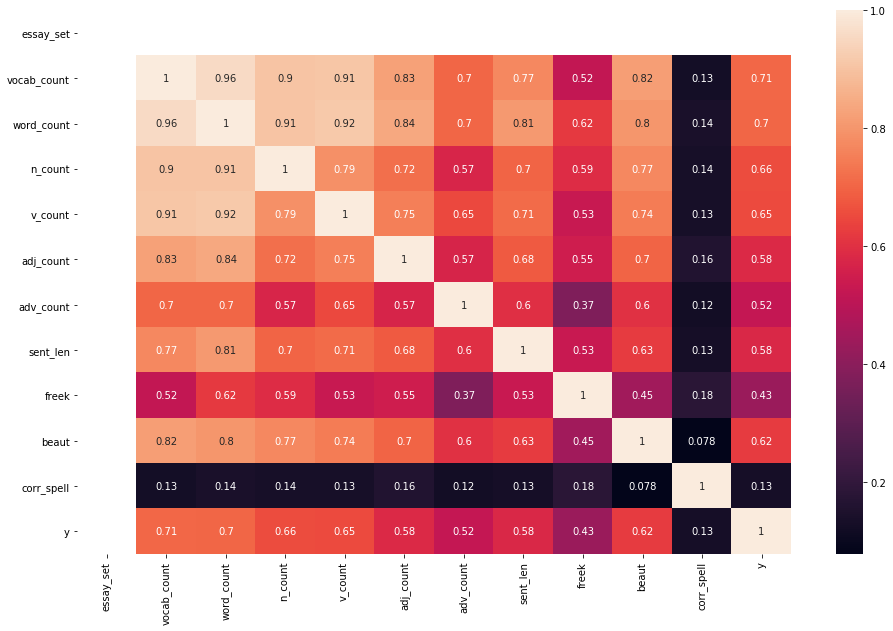

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()